## Problem Statement
Banking-Classification

There has been a revenue decline in the Portuguese Bank and they would like to know what actions to take. After investigation, they found that the root cause was that their customers are not investing enough for long term deposits. So the bank would like to identify existing customers that have a higher chance to subscribe for a long term deposit and focus marketing efforts on such customers.

The data is related to direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be subscribed ('yes') or not ('no') subscribed.


Feraure Explanation

1. Age: The age of the customer.
2. Job: The type of job the customer has.
3. Marital: The marital status of the customer.
4. Education: The level of education of the customer.
5. Default: Whether the customer has defaulted on a loan in the past.
6. Housing: Whether the customer has a housing loan.
7. Loan: Whether the customer has a personal loan.
8. Contact: The method of communication used to contact the customer.
9. Month: The month in which the customer was last contacted.
10. Day_of_week: The day of the week on which the customer was last contacted.
11. Duration: The duration of the last contact with the custome,it was the important fearute because if duration=0 then y=no.
12. Campaign: The number of contacts made during this campaign for this customer.
13. Pdays: The number of days that passed by after the customer was last contacted from a previous campaign.
14. Previous: The number of contacts made before this campaign for this customer.
15. Poutcome: The outcome of the previous marketing campaign.

These features can be used to predict whether the customer will subscribe to a bank term deposit (the target variable 'y'). 


## Psecudo Code

1.  Loading the dataset using pandas.
2.  Checking the data using Head,Shape,Describe,nunique
3.  Checking the Null Values.
4.  Checking Correlation between Features by using Heatmap,if correlation is high between features, drop either one of the feature.
5.  Droping features 
6.  Split the dataset into features (x) and target variable (y)
7.  Checking the Updated Data.
8.  Seperating the Numerical & Categorical columns.
9.  Converting the Numerical & Categorical columns into Data Frames.
10. Converting the Categorical Data into Numerical Data by using LabelEncoder.
11. Concating the converted Categorical data and Numerical data into single  train_data.
12. Scaling the features using MinMaxScaler() from scikit-learn.
13. Split the data into training and testing sets using train_test_split() from scikit-learn.
14. Initialize the KNN classifier with the desired hyperparameters using KNeighborsClassifier() from scikit-learn.
15. Defning the parameter Grid Search
16. Creating the Grid Search CV and fit to train data.
17. Evaluate the best hyper parameter & accuracy of the model using accuracy_score() from scikit-learn on both train and test data.
18. Print the accuracy score.


In [1]:
#import required libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Load dataset
train_data=pd.read_csv('/content/new_train.csv')
test_data=pd.read_csv('/content/new_test (1).csv')


In [3]:
train_data1=train_data.sample(n=1500)

In [4]:
# To check train data 
train_data1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
2330,46,services,married,high.school,no,no,no,cellular,jul,thu,92,1,999,0,nonexistent,no
25583,32,technician,single,high.school,no,no,no,cellular,may,mon,236,2,999,0,nonexistent,no
5242,42,technician,married,university.degree,no,yes,yes,cellular,aug,thu,111,1,999,0,nonexistent,no
13176,52,retired,married,basic.6y,no,no,no,cellular,jul,tue,203,1,999,0,nonexistent,no
12757,31,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,723,2,999,0,nonexistent,no


In [5]:
train_data1.y.value_counts()

no     1324
yes     176
Name: y, dtype: int64

In [6]:
# to check train data shape
# shape includes no of records & features 
train_data1.shape

(1500, 16)

In [7]:
test_data1=test_data.sample(n=1500)

In [8]:
#To check test data
test_data1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome
4673,42,4,1,6,1,0,0,0,1,3,217,1,1
1377,38,0,1,6,0,2,0,1,4,2,153,5,1
6203,29,7,1,3,0,2,0,1,6,3,95,4,1
586,38,0,1,3,0,2,0,1,6,2,260,5,1
3364,55,1,1,2,0,2,0,1,6,4,323,4,1


In [9]:
# to check test data shape
# shape includes no of records & features 
test_data1.shape


(1500, 13)

In [10]:
# Total count,Range,percentiles,standard deviation of each feature 
train_data1.describe()

,age,duration,campaign,pdays,previous
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,40.288000,252.898000,2.502667,961.262000,0.170667
std,10.298662,231.573155,2.551535,189.942827,0.518059
min,17.000000,4.000000,1.000000,0.000000,0.000000
25%,33.000000,101.750000,1.000000,999.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000
75%,48.000000,323.000000,3.000000,999.000000,0.000000
max,88.000000,1871.000000,21.000000,999.000000,6.000000


In [11]:
test_data1.describe()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.0000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,39.761333,3.865333,1.163333,3.661333,0.212000,1.1160,0.306667,0.386000,4.196667,2.050000,227.782667,2.154667,0.932000
std,8.980468,3.629138,0.611750,2.140489,0.408861,0.9821,0.704949,0.486993,2.296121,1.383513,159.002891,1.361855,0.347548
min,26.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,36.000000,1.000000,0.000000
25%,32.000000,1.000000,1.000000,2.000000,0.000000,0.0000,0.000000,0.000000,3.000000,1.000000,102.000000,1.000000,1.000000
50%,38.000000,3.000000,1.000000,3.000000,0.000000,2.0000,0.000000,0.000000,4.000000,2.000000,181.000000,2.000000,1.000000
75%,47.000000,7.000000,2.000000,6.000000,0.000000,2.0000,0.000000,1.000000,6.000000,3.000000,315.250000,3.000000,1.000000
max,55.000000,11.000000,3.000000,7.000000,1.000000,2.0000,2.000000,1.000000,9.000000,4.000000,554.000000,5.000000,2.000000


In [12]:
#no of unique values in each feature 
train_data1.nunique()

age             62
job             12
marital          4
education        8
default          2
housing          3
loan             3
contact          2
month           10
day_of_week      5
duration       573
campaign        20
pdays           16
previous         6
poutcome         3
y                2
dtype: int64

In [13]:
test_data1.nunique()

age             30
job             12
marital          4
education        7
default          2
housing          3
loan             3
contact          2
month           10
day_of_week      5
duration       407
campaign         5
poutcome         3
dtype: int64

In [14]:
#info regarding class , index , non null values count , Data Types
train_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 2330 to 19236
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          1500 non-null   int64 
 1   job          1500 non-null   object
 2   marital      1500 non-null   object
 3   education    1500 non-null   object
 4   default      1500 non-null   object
 5   housing      1500 non-null   object
 6   loan         1500 non-null   object
 7   contact      1500 non-null   object
 8   month        1500 non-null   object
 9   day_of_week  1500 non-null   object
 10  duration     1500 non-null   int64 
 11  campaign     1500 non-null   int64 
 12  pdays        1500 non-null   int64 
 13  previous     1500 non-null   int64 
 14  poutcome     1500 non-null   object
 15  y            1500 non-null   object
dtypes: int64(5), object(11)
memory usage: 199.2+ KB


In [15]:
test_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 4673 to 6205
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   age          1500 non-null   int64
 1   job          1500 non-null   int64
 2   marital      1500 non-null   int64
 3   education    1500 non-null   int64
 4   default      1500 non-null   int64
 5   housing      1500 non-null   int64
 6   loan         1500 non-null   int64
 7   contact      1500 non-null   int64
 8   month        1500 non-null   int64
 9   day_of_week  1500 non-null   int64
 10  duration     1500 non-null   int64
 11  campaign     1500 non-null   int64
 12  poutcome     1500 non-null   int64
dtypes: int64(13)
memory usage: 164.1 KB


In [16]:
#Total null values count in data 
train_data1.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

In [17]:
test_data1.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
poutcome       0
dtype: int64

In [18]:
#correlation between features 
#If correlation is high we drop either one of the features
train_data1.corr()

,age,duration,campaign,pdays,previous
age,1.000000,0.004216,-0.019704,-0.104895,0.059677
duration,0.004216,1.000000,-0.108514,-0.083720,0.062158
campaign,-0.019704,-0.108514,1.000000,0.056957,-0.086645
pdays,-0.104895,-0.083720,0.056957,1.000000,-0.655379
previous,0.059677,0.062158,-0.086645,-0.655379,1.000000


<AxesSubplot:>

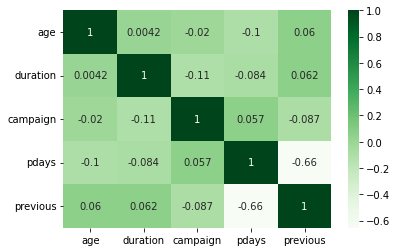

In [19]:
# features correlation with  visualization 
# features correlation indicated in colours & more correlated with white
sns.heatmap(train_data1.corr(),annot=True,cmap='Greens')

In [20]:
test_data1.corr()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome
age,1.000000,0.010742,-0.395682,-0.104539,0.158594,0.005335,-0.047336,-0.016598,-0.052171,0.003538,-0.022215,0.027184,0.017026
job,0.010742,1.000000,0.028243,0.163133,-0.014466,-0.013395,0.008591,-0.005672,-0.049017,-0.079307,-0.012058,0.029323,-0.010967
marital,-0.395682,0.028243,1.000000,0.078953,-0.045182,-0.011570,-0.018769,-0.023669,0.017485,-0.012020,0.029280,-0.005520,-0.023031
education,-0.104539,0.163133,0.078953,1.000000,-0.159546,0.010449,-0.001863,-0.053702,-0.028110,-0.038206,-0.025331,0.011573,0.024621
default,0.158594,-0.014466,-0.045182,-0.159546,1.000000,-0.043010,0.003426,0.114759,0.025198,0.033139,-0.016571,0.005770,-0.001765
housing,0.005335,-0.013395,-0.011570,0.010449,-0.043010,1.000000,0.043014,-0.099261,-0.044144,-0.012127,-0.019135,-0.023898,-0.025736
loan,-0.047336,0.008591,-0.018769,-0.001863,0.003426,0.043014,1.000000,0.018344,0.018766,-0.017784,-0.024396,0.020744,0.006208
contact,-0.016598,-0.005672,-0.023669,-0.053702,0.114759,-0.099261,0.018344,1.000000,0.309115,0.046586,-0.005791,0.077903,0.123652
month,-0.052171,-0.049017,0.017485,-0.028110,0.025198,-0.044144,0.018766,0.309115,1.000000,0.030293,-0.018554,-0.102750,-0.075187
day_of_week,0.003538,-0.079307,-0.012020,-0.038206,0.033139,-0.012127,-0.017784,0.046586,0.030293,1.000000,0.043094,0.001204,0.047310


<AxesSubplot:>

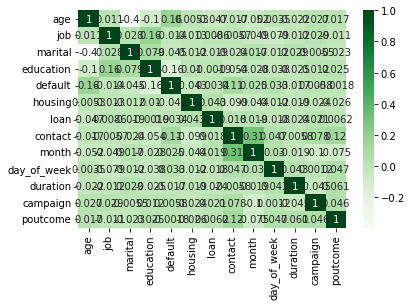

In [21]:
sns.heatmap(test_data1.corr(),annot=True,cmap='Greens')

In [22]:
#Drop features may not required in model prediction 
xtr=train_data1.drop(['pdays','previous','month','day_of_week'],axis=1)
xte=test_data1.drop(['month','day_of_week'],axis=1)
xtr

,age,job,marital,education,default,housing,loan,contact,duration,campaign,poutcome,y
2330,46,services,married,high.school,no,no,no,cellular,92,1,nonexistent,no
25583,32,technician,single,high.school,no,no,no,cellular,236,2,nonexistent,no
5242,42,technician,married,university.degree,no,yes,yes,cellular,111,1,nonexistent,no
13176,52,retired,married,basic.6y,no,no,no,cellular,203,1,nonexistent,no
12757,31,entrepreneur,married,university.degree,no,no,no,telephone,723,2,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...
6065,45,management,married,university.degree,no,no,no,telephone,369,2,nonexistent,no
23670,54,management,divorced,university.degree,no,no,no,telephone,288,2,nonexistent,no
12718,25,blue-collar,married,basic.9y,unknown,yes,no,telephone,763,1,nonexistent,yes
20103,41,services,divorced,unknown,no,no,no,telephone,211,3,nonexistent,no


In [23]:
# splitting numerical & categorical columns
num_cols=list(xtr.select_dtypes(exclude='object').columns)
cat_cols=list(xtr.select_dtypes(include='object').columns)

In [24]:
#numerical features 
num_cols

['age', 'duration', 'campaign']

In [25]:
#categorical features 
cat_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'poutcome',
 'y']

In [26]:
# converting numerical & categorical columns into data frames 
xtr_num=xtr[num_cols]
xtr_cat=xtr[cat_cols]
xtr[cat_cols]=xtr[cat_cols].astype("category")
xtr_cat

,job,marital,education,default,housing,loan,contact,poutcome,y
2330,services,married,high.school,no,no,no,cellular,nonexistent,no
25583,technician,single,high.school,no,no,no,cellular,nonexistent,no
5242,technician,married,university.degree,no,yes,yes,cellular,nonexistent,no
13176,retired,married,basic.6y,no,no,no,cellular,nonexistent,no
12757,entrepreneur,married,university.degree,no,no,no,telephone,nonexistent,no
...,...,...,...,...,...,...,...,...,...
6065,management,married,university.degree,no,no,no,telephone,nonexistent,no
23670,management,divorced,university.degree,no,no,no,telephone,nonexistent,no
12718,blue-collar,married,basic.9y,unknown,yes,no,telephone,nonexistent,yes
20103,services,divorced,unknown,no,no,no,telephone,nonexistent,no


In [27]:
xtr_cat=pd.DataFrame(xtr_cat)

In [28]:
xtr_cat1=xtr_cat.drop(['y'],axis=1)
target=xtr_cat.drop(xtr_cat1,axis=1)
target.head()

,y
2330,no
25583,no
5242,no
13176,no
12757,no


In [29]:
cat_cols1=list(xtr_cat1.select_dtypes(include='object').columns)

In [30]:
# converting numerical & categorical columns into data frames 
xtr_cat1_tr=xtr[cat_cols]
xtr_cat1[cat_cols1]=xtr_cat1[cat_cols1].astype("category")
xtr_cat1

,job,marital,education,default,housing,loan,contact,poutcome
2330,services,married,high.school,no,no,no,cellular,nonexistent
25583,technician,single,high.school,no,no,no,cellular,nonexistent
5242,technician,married,university.degree,no,yes,yes,cellular,nonexistent
13176,retired,married,basic.6y,no,no,no,cellular,nonexistent
12757,entrepreneur,married,university.degree,no,no,no,telephone,nonexistent
...,...,...,...,...,...,...,...,...
6065,management,married,university.degree,no,no,no,telephone,nonexistent
23670,management,divorced,university.degree,no,no,no,telephone,nonexistent
12718,blue-collar,married,basic.9y,unknown,yes,no,telephone,nonexistent
20103,services,divorced,unknown,no,no,no,telephone,nonexistent


In [31]:
xtr_num

,age,duration,campaign
2330,46,92,1
25583,32,236,2
5242,42,111,1
13176,52,203,1
12757,31,723,2
...,...,...,...
6065,45,369,2
23670,54,288,2
12718,25,763,1
20103,41,211,3


In [32]:
#converting the target variable as num by using Labelencoder
from sklearn.preprocessing import  LabelEncoder
encoder=LabelEncoder()
for col in cat_cols1: 
    xtr_cat1[col]=encoder.fit_transform(xtr_cat1[col])

In [33]:
xtr_cat1.head()

,job,marital,education,default,housing,loan,contact,poutcome
2330,7,1,3,0,0,0,0,1
25583,9,2,3,0,0,0,0,1
5242,9,1,6,0,2,2,0,1
13176,5,1,1,0,0,0,0,1
12757,2,1,6,0,0,0,1,1


In [34]:
encoder_tg=LabelEncoder() 
target_enc=encoder_tg.fit_transform(target)

In [35]:
xtr_cat1.head()

,job,marital,education,default,housing,loan,contact,poutcome
2330,7,1,3,0,0,0,0,1
25583,9,2,3,0,0,0,0,1
5242,9,1,6,0,2,2,0,1
13176,5,1,1,0,0,0,0,1
12757,2,1,6,0,0,0,1,1


In [36]:
xtr_cat1=pd.concat([xtr_cat1,target],axis=1)

In [37]:
#concatination of transformed categorical data & numerical data
train_data1=pd.concat([xtr_cat1,xtr_num],axis=1)

In [38]:
columns=train_data1.columns
columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'poutcome', 'y', 'age', 'duration', 'campaign'],
      dtype='object')

In [39]:
columns=xte.columns
columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'duration', 'campaign', 'poutcome'],
      dtype='object')

In [40]:
#concating the target variable to data
x_ov=train_data1.drop(['y'],axis=1)
y_ov=train_data1.drop(x_ov,axis=1)

In [41]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

#Separate majority and minority classes
x_df = train_data1[train_data1['y']==0]
y_df = train_data1[train_data1['y']==1]



In [42]:
print(x_df.shape,y_df.shape)

(0, 12) (0, 12)


In [43]:
smk=SMOTETomek(random_state=42)

In [44]:
x_ov1,y_ov1=smk.fit_resample(x_ov,y_ov)


In [45]:
print(x_ov1.shape,y_ov1.shape)

(2568, 11) (2568, 1)


In [46]:
y_ov1.value_counts()

y  
no     1284
yes    1284
dtype: int64

In [47]:
#normalizing the data between 0 to 1
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
train_data1=pd.DataFrame(scale.fit_transform(x_ov1),columns=columns)
test_data1=pd.DataFrame(scale.fit_transform(xte),columns=columns)
train_data1.head()

,age,job,marital,education,default,housing,loan,contact,duration,campaign,poutcome
0,0.636364,0.333333,0.428571,0.0,0.0,0.0,0.0,0.5,0.408451,0.047134,0.00
1,0.818182,0.666667,0.428571,0.0,0.0,0.0,0.0,0.5,0.211268,0.124264,0.05
2,0.818182,0.333333,0.857143,0.0,1.0,1.0,0.0,0.5,0.352113,0.057311,0.00
3,0.454545,0.333333,0.142857,0.0,0.0,0.0,0.0,0.5,0.492958,0.106588,0.00
4,0.181818,0.333333,0.857143,0.0,0.0,0.0,1.0,0.5,0.197183,0.385110,0.05


In [48]:
test_data1.head()

,age,job,marital,education,default,housing,loan,contact,duration,campaign,poutcome
0,0.551724,0.363636,0.333333,0.857143,1.0,0.0,0.0,0.0,0.349421,0.00,0.5
1,0.413793,0.000000,0.333333,0.857143,0.0,1.0,0.0,1.0,0.225869,1.00,0.5
2,0.103448,0.636364,0.333333,0.428571,0.0,1.0,0.0,1.0,0.113900,0.75,0.5
3,0.413793,0.000000,0.333333,0.428571,0.0,1.0,0.0,1.0,0.432432,1.00,0.5
4,1.000000,0.090909,0.333333,0.285714,0.0,1.0,0.0,1.0,0.554054,0.75,0.5


In [49]:
#split data with test size of 30%
from sklearn.model_selection import train_test_split, GridSearchCV
X_train,X_test,y_train,y_test=train_test_split(train_data1,y_ov1,test_size=0.3,random_state=12345)
print(X_train.shape)
print(y_train.shape)
y_test.shape

(1797, 11)
(1797, 1)


(771, 1)

In [50]:
import numpy as np
from scipy.spatial.distance import cdist

class KNNClassifier:
    def __init__(self, k=3):
        self.k = k
    
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    
    def predict(self, X_test):
        dists = cdist(X_test, self.X_train)  # pairwise distances between test and train data
        nearest_indices = np.argsort(dists, axis=1)[:, :self.k]  # indices of k nearest neighbors
        nearest_labels = self.y_train[nearest_indices]  # labels of k nearest neighbors
        mode, _ = mode(nearest_labels, axis=1)  # majority vote of k nearest neighbor labels
        return mode.ravel()
    
    def score(self, X_test, y_test):
        y_pred = self.predict(X_test)
        accuracy = np.mean(y_pred == y_test)
        return accuracy


In [51]:
from sklearn.metrics import accuracy_score

In [52]:
# define the parameter grid
param_grid = {'n_neighbors': [7,9]}

In [53]:
knn = KNNClassifier()

In [54]:
grid_search = GridSearchCV(knn, param_grid=param_grid, cv=5)


In [56]:
knn.fit(X_test, y_test)

In [57]:
y_pred = knn.predict(X_test)


KeyError: ignored

In [ ]:
# Calculate the accuracy of the predictions
accuracy = knn.score(X_test, y_test)
print(f"Accuracy: {accuracy:.2f}")

This problem is important for banks because it allows them to identify potential customers who are more likely to subscribe to their services, and to target their marketing efforts more effectively.
It also allows them to better manage their resources and optimize their marketing strategies, ultimately leading to increased revenue and profitability.